In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from matplotlib import style

In [4]:
style.use(style='ggplot')

In [5]:
class NQueens(object):
    """This class is an implementation of NQueen Back Propagation algorithm."""

    def __init__(self, n):
        """This is an initializer.
        
        Parameter
        ---------
        `n` : The dimension value."""
        
        self.n = n
        self.x = [i for i in range(self.n)]
        self.count_success = 0
        self.success_solutions = []

    def chess_matrix(self):
        """This method, based on the value `n` creates a chess matrix of size n x n.
        Returns : chessboard (binary matrix) if `n` > 3 else None."""
        
        if self.n > 0:
            if self.n > 3:
                chessboard = [[0 if (row + col) % 2 == 0 else 1 for col in range(self.n)] 
                              for row in range(self.n)]
                return chessboard
            else:
                return None
        else:
            return None

    def place_queen(self, k, i):
        """This method places the queen.
        
        Parameters
        ----------
        `k` : kth row of the chessboard
        `i` : ith column of the chessboard
                
        Returns : bool ==> True --> placed; False --> not placed;"""
        
        for j in range(k):
            if (self.x[j] == i or (abs(self.x[j]-i) == abs(j-k))):
                return False
        return True

    def nqueens(self, k):
        """This method finds combinations of possible safe 
        permutations for the queens.
        And `x[k] = i` places the queen in kth row and ith column.
        
        Parameter
        ---------
        `k` : kth row of the chessboard
        
        Returns 
        -------
        `success_solutions` : safe permutations of queens"""
        
        for i in range(self.n):
            if self.place_queen(k=k, i=i):
                self.x[k] = i
                if k+1 == self.n:
                    self.success_solutions += self.x
                    self.count_success += 1
                else:
                    self.nqueens(k=k+1)
        return self.success_solutions

    def get_nqueen_list(self):
        if self.n > 0:
            success = np.array(self.nqueens(k=0)).reshape((self.count_success, self.n))
            return success
        else:
            return None

    def get_nqueen_matrices(self, nqueen_array=None):
        success_board = list()
        for board in nqueen_array:
            success_board.append([[1 if i == num else 0 for i in range(len(board))] 
                                  for num in board])
        success_board = np.array(success_board)
        return success_board

    def visualize_nqueen_solutions(self, success_array=None):
        if self.chess_matrix() != None:
            print("Queens : {} and Dimension : {} x {}".format(self.n, self.n, self.n))
            print("\nAll possible safe permutations : {}".format(self.count_success))
            if len(success_array) > 3:
                success_indices = [np.random.randint(low=0, high=self.count_success) 
                                   for i in range(3)]
                print("\nRandom picked indices : {}".format(success_indices))
                print("\nThe NQueen solutions\n\n{}".format(success_array[success_indices]))
                print("\nThe NQueen matrices\n\n{}\n".format(
                    self.get_nqueen_matrices(nqueen_array=success_array[success_indices])))
                
                fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
                axes.flatten()
                for success, ax in zip(success_indices, axes):
                    ax.imshow(self.chess_matrix(), cmap=plt.cm.copper)
                    
                    if self.n >= 8:
                        size = 70
                    else:
                        size = 150
                    
                    ax.scatter(x=list(range(self.n)), 
                               y=success_array[success], 
                               s=size, color='magenta')
                    ax.xaxis.tick_top()
                    ax.axis('off')
                    ax.grid(False)
                plt.show()
            elif len(success_array) <= 3:
                print("\nThe NQueen solutions\n\n{}".format(success_array))
                print("\nThe NQueen matrices\n\n{}\n".format(
                    self.get_nqueen_matrices(nqueen_array=success_array)))
                
                fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(self.n*2, self.n*2))
                axes.flatten()
                for success, ax in zip(range(2), axes):
                    ax.imshow(self.chess_matrix(), cmap=plt.cm.copper)
                    ax.scatter(x=list(range(self.n)), 
                               y=success_array[success], 
                               s=150, color='magenta')
                    ax.xaxis.tick_top()
                    ax.axis('off')
                    ax.grid(False)
                plt.show()
            else:
                return None
        else:
            return None

Queens : 8 and Dimension : 8 x 8

All possible safe permutations : 92

Random picked indices : [42, 72, 19]

The NQueen solutions

[[3 6 4 2 0 5 7 1]
 [5 2 6 1 3 7 0 4]
 [2 5 1 6 4 0 7 3]]

The NQueen matrices

[[[0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 1 0]
  [0 0 0 0 1 0 0 0]
  [0 0 1 0 0 0 0 0]
  [1 0 0 0 0 0 0 0]
  [0 0 0 0 0 1 0 0]
  [0 0 0 0 0 0 0 1]
  [0 1 0 0 0 0 0 0]]

 [[0 0 0 0 0 1 0 0]
  [0 0 1 0 0 0 0 0]
  [0 0 0 0 0 0 1 0]
  [0 1 0 0 0 0 0 0]
  [0 0 0 1 0 0 0 0]
  [0 0 0 0 0 0 0 1]
  [1 0 0 0 0 0 0 0]
  [0 0 0 0 1 0 0 0]]

 [[0 0 1 0 0 0 0 0]
  [0 0 0 0 0 1 0 0]
  [0 1 0 0 0 0 0 0]
  [0 0 0 0 0 0 1 0]
  [0 0 0 0 1 0 0 0]
  [1 0 0 0 0 0 0 0]
  [0 0 0 0 0 0 0 1]
  [0 0 0 1 0 0 0 0]]]



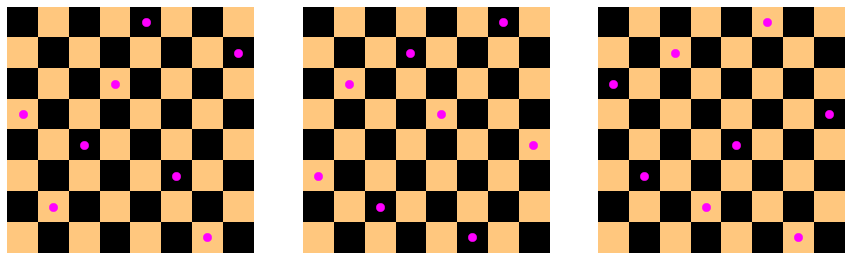

In [6]:
nqueen_solve = NQueens(n=8)
success_list = nqueen_solve.get_nqueen_list()
success_matrix = nqueen_solve.get_nqueen_matrices(nqueen_array=success_list)
nqueen_solve.visualize_nqueen_solutions(success_array=success_list)

In [7]:
print(success_list)

[[0 4 7 5 2 6 1 3]
 [0 5 7 2 6 3 1 4]
 [0 6 3 5 7 1 4 2]
 [0 6 4 7 1 3 5 2]
 [1 3 5 7 2 0 6 4]
 [1 4 6 0 2 7 5 3]
 [1 4 6 3 0 7 5 2]
 [1 5 0 6 3 7 2 4]
 [1 5 7 2 0 3 6 4]
 [1 6 2 5 7 4 0 3]
 [1 6 4 7 0 3 5 2]
 [1 7 5 0 2 4 6 3]
 [2 0 6 4 7 1 3 5]
 [2 4 1 7 0 6 3 5]
 [2 4 1 7 5 3 6 0]
 [2 4 6 0 3 1 7 5]
 [2 4 7 3 0 6 1 5]
 [2 5 1 4 7 0 6 3]
 [2 5 1 6 0 3 7 4]
 [2 5 1 6 4 0 7 3]
 [2 5 3 0 7 4 6 1]
 [2 5 3 1 7 4 6 0]
 [2 5 7 0 3 6 4 1]
 [2 5 7 0 4 6 1 3]
 [2 5 7 1 3 0 6 4]
 [2 6 1 7 4 0 3 5]
 [2 6 1 7 5 3 0 4]
 [2 7 3 6 0 5 1 4]
 [3 0 4 7 1 6 2 5]
 [3 0 4 7 5 2 6 1]
 [3 1 4 7 5 0 2 6]
 [3 1 6 2 5 7 0 4]
 [3 1 6 2 5 7 4 0]
 [3 1 6 4 0 7 5 2]
 [3 1 7 4 6 0 2 5]
 [3 1 7 5 0 2 4 6]
 [3 5 0 4 1 7 2 6]
 [3 5 7 1 6 0 2 4]
 [3 5 7 2 0 6 4 1]
 [3 6 0 7 4 1 5 2]
 [3 6 2 7 1 4 0 5]
 [3 6 4 1 5 0 2 7]
 [3 6 4 2 0 5 7 1]
 [3 7 0 2 5 1 6 4]
 [3 7 0 4 6 1 5 2]
 [3 7 4 2 0 6 1 5]
 [4 0 3 5 7 1 6 2]
 [4 0 7 3 1 6 2 5]
 [4 0 7 5 2 6 1 3]
 [4 1 3 5 7 2 0 6]
 [4 1 3 6 2 7 5 0]
 [4 1 5 0 6 3 7 2]
 [4 1 7 0 3 

In [8]:
print(success_matrix)

[[[1 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 0 1 0]
  [0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 0]
  [0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 1 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 1]
  [0 1 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 1 0 0]]

 [[0 0 0 ... 0 0 1]
  [0 0 1 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 0]
  [1 0 0 ... 0 0 0]
  ...
  [0 1 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]
  [0 0 0 ... 0 0 0]]]
